# 3.2 Model Inference
### Background
Now that we've compared our models, we're able to determine which model performed best for a particular use case. We now want to use the best performing model to predict the activity of a set of new compounds against (in this demo) PXR.

### Requirements
For this demo, you will need:
1. A model trained in anvil
2. A dataset of compounds unseen by the model. The dataset must contain a column of SMILES strings.
## 1. Overview
This notebook will walk you through how to use a model to predict on a new dataset. In this demo, we will do inference in the `Chemprop Multitask` model.

## 2. [OPTIONAL] Data Cleaning
You may want to do some data cleaning prior to model prediction, i.e. standardizing the SMILES strings and dropping any duplicates. This can be done as shown in `1.1_Curating_external_datasets.ipynb` with our toolkit.

In [ ]:
from openadmet.toolkit.chemoinformatics.data_curation import DataProcessing
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')  # Silence logger messages from RDKit

# Read in the data
df = DataProcessing.read_file("raw_data/new_compounds.csv")
# Now instantiate a processor class
processor = DataProcessing()
# Use the processor to create a standardized or canonical SMILES string and unique INCHIKEY value
processed_data = processor.standardize_smiles_and_convert(data=df, smiles_col="SMILES")
processed_data.to_csv("processed_data/cleaned_new_compounds.csv", index=False)
processed_data

,SMILES,OPENADMET_CANONICAL_SMILES,OPENADMET_INCHIKEY
0,O=CC1=CC=CC=C1OCCOC1=CC=C(Cl)C2=CC=CN=C12,O=CC1=CC=CC=C1OCCOC1=CC=C(Cl)C2=CC=CN=C12,VTVGLORWDPELFX-UHFFFAOYSA-N
1,CCOCC(=O)NC1CCN(C2=CC(=O)N(CC)N=C2)CC1,CCOCC(=O)NC1CCN(C2=CC(=O)N(CC)N=C2)CC1,FMLZXKPGQAASGU-UHFFFAOYSA-N
2,CC(C)(C)C1=CN=NN1C1=CC=C(C=CC2=CC=C(C=O)C=C2)C=C1,CC(C)(C)C1=CN=NN1C1=CC=C(C=CC2=CC=C(C=O)C=C2)C=C1,ZEUBVMQATGCHLE-UHFFFAOYSA-N
3,CC(NC(=O)C1=NNC(C2CC2)=C1)C1=NN=C(CC(O)=O)N1,CC(NC(=O)C1=NNC(C2CC2)=C1)C1=NNC(CC(=O)O)=N1,AQUGDJFAVCQSLO-UHFFFAOYSA-N
4,C=CC(=O)N1CCC(CC(=O)N2CCC(N(C)C)CC2)CC1,C=CC(=O)N1CCC(CC(=O)N2CCC(N(C)C)CC2)CC1,FPYPVJAPHZZJOH-UHFFFAOYSA-N
...,...,...,...
195,COC1=CC(CN2C[C@H]3CC[C@@H]2CN(CC(=O)N(C)C)C3)=...,COC1=CC=C(F)C(CN2C[C@H]3CC[C@@H]2CN(CC(=O)N(C)...,YSEJGQCBNHZIQH-GOEBONIOSA-N
196,C=CC(=O)N[C@@H]1CCCN(C(=O)CN2C=C(C3CCOC3)C=N2)C1,C=CC(=O)N[C@@H]1CCCN(C(=O)CN2C=C(C3CCOC3)C=N2)C1,NGZKEHWIPTUESE-AWKYBWMHSA-N
197,C=CC(=O)N(C)CC(=O)N1CCOC(C2=CC=C(Cl)S2)C1,C=CC(=O)N(C)CC(=O)N1CCOC(C2=CC=C(Cl)S2)C1,DHMLPRAXCFAFAS-UHFFFAOYSA-N
198,C=CC(=O)N(C)CC(=O)N1CCCC(NC(=O)C2=CC3=CC=CC=C3...,C=CC(=O)N(C)CC(=O)N1CCCC(NC(=O)C2=CC3=CC=CC=C3...,JONFMHCBNDRKCB-UHFFFAOYSA-N


## 3. Model Inference
As with training models with Anvil, doing model inference is also a simple command with the following arguments:
```bash
openadmet predict \
    --input-path <the path to the data to predict on> \
    --input-col <the column to of the data to predict on, often SMILES> \
    --model-dir <the anvil_training directory of the model to predict with> \
    --output-csv <the path to an output CSV to save the predictions to> \
    --accelerator <whether to use gpu or cpu, defaults to gpu>
```

In [2]:
%%bash
openadmet predict \
    --input-path processed_data/cleaned_new_compounds.csv \
    --input-col OPENADMET_CANONICAL_SMILES \
    --model-dir ../../2_Modeling/2.1_Training_models_with_Anvil/lgbm \
    --output-csv predictions.csv \
    --accelerator cpu

[09/23/25 12:40:50] INFO     Starting prediction                ]8;id=345393;file:///Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/openadmet/models/inference/inference.py\inference.py]8;;\:]8;id=776653;file:///Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/openadmet/models/inference/inference.py#141\141]8;;\
                    INFO     Input path:                        ]8;id=6590;file:///Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/openadmet/models/inference/inference.py\inference.py]8;;\:]8;id=649409;file:///Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/openadmet/models/inference/inference.py#142\142]8;;\
                             processed_data/cleaned_new_compoun                 
                             ds.csv                                             
                    INFO     Model directories:                 ]8;id=679738;file:///Users/cynthiaxu/miniconda3/envs/demo

/Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: Future

[09/23/25 12:41:00] INFO     Predictions for model 0 task 0     ]8;id=749632;file:///Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/openadmet/models/inference/inference.py\inference.py]8;;\:]8;id=108661;file:///Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/openadmet/models/inference/inference.py#233\233]8;;\
                             saved to column                                    
                             'OADMET_PRED_openadmet-chembl_OPEN                 
                             ADMET_LOGAC50', std saved to                       
                             column                                             
                             'OADMET_STD_openadmet-chembl_OPENA                 
                             DMET_LOGAC50'                                      
                    INFO     Finished prediction                ]8;id=857778;file:///Users/cynthiaxu/miniconda3/envs/demos/lib/python3.12/site-packages/op

## 4. Data Analysis
With the newly created `predictions.csv` file, you can now perform any data analysis you like to explore which compounds are worth further exploring, i.e. empirically.

Text(0.5, 1.0, 'Distribution of predicted pEC50s')

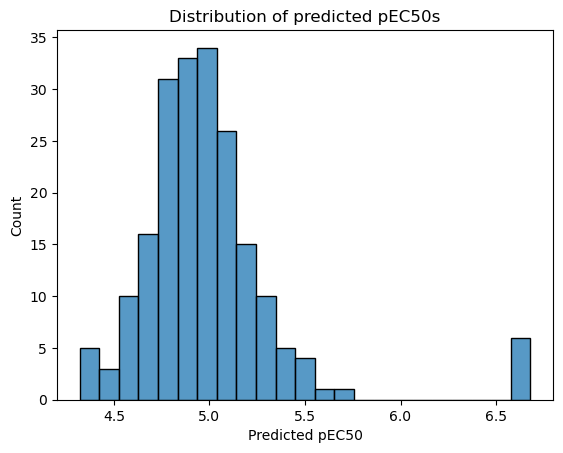

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df = processor.read_file("predictions.csv")

plt.figure()
sns.histplot(data=df, x='OADMET_PRED_openadmet-chembl_OPENADMET_LOGAC50')
plt.xlabel("Predicted pEC50")
plt.title("Distribution of predicted pEC50s")

✨✨✨✨✨✨✨